# Support Vector Machine

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('svm data.csv')

In [3]:
df.head()

,Unnamed: 0,feature1,feature2,label_y
0,0,8.660254,-5.00000,0
1,1,8.717792,-4.89899,0
2,2,8.773790,-4.79798,0
3,3,8.828277,-4.69697,0
4,4,8.881281,-4.59596,0


In [4]:
df.tail()

,Unnamed: 0,feature1,feature2,label_y
395,395,-1.969049,-4.59596,1
396,396,-1.714198,-4.69697,1
397,397,-1.406908,-4.79798,1
398,398,-0.999949,-4.89899,1
399,399,-0.000000,-5.00000,1


In [5]:
df.describe()

,Unnamed: 0,feature1,feature2,label_y
count,400.000000,4.000000e+02,4.000000e+02,400.000000
mean,199.500000,-3.541611e-16,-8.881784e-18,0.500000
std,115.614301,7.357557e+00,2.919416e+00,0.500626
min,0.000000,-9.999872e+00,-5.000000e+00,0.000000
25%,99.750000,-5.914872e+00,-2.500000e+00,0.000000
50%,199.500000,0.000000e+00,0.000000e+00,0.500000
75%,299.250000,5.914872e+00,2.500000e+00,1.000000
max,399.000000,9.999872e+00,5.000000e+00,1.000000


In [6]:
df.shape

(400, 4)

# Drop unnecessary Feature

In [7]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
df.head()

,feature1,feature2,label_y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


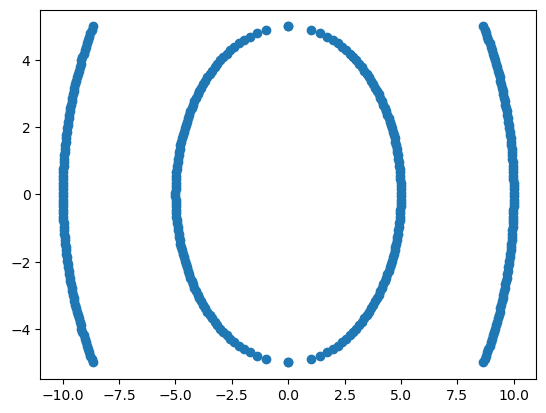

In [9]:
plt.scatter(df.feature1, df.feature2)

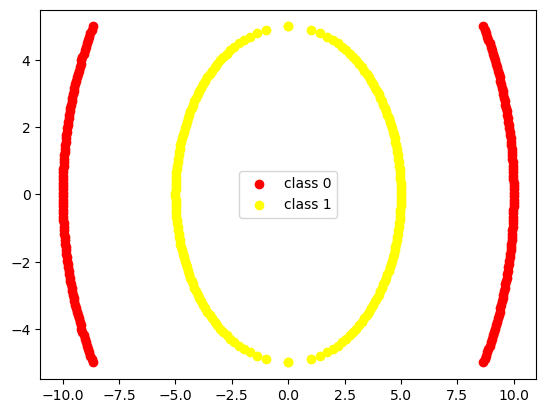

In [10]:
df1 = df[df.label_y == 0]
df2 = df[df.label_y == 1]
plt.scatter(df1['feature1'], df1['feature2'], color= 'red', label= 'class 0')
plt.scatter(df2['feature1'], df2['feature2'], color= 'yellow', label= 'class 1')
plt.legend()

# Score before apply any Model

In [11]:
from sklearn.svm import SVC # x stands for classifier ; r stands for regressor
from sklearn.svm import SVC

In [12]:
svm1 = SVC(kernel = 'linear')

In [13]:
x = df.drop('label_y', axis = 1)
svm1.fit(x, df['label_y'])


SVC(kernel='linear')

In [14]:
svm1.score(x, df['label_y'])

0.5

# Lower to Higher Dimension

In [15]:
df['f1_square'] = df['feature1'] **2
df['f2_square'] = df['feature2'] ** 2
df['f1f2'] = df['feature1'] * df['feature2']

In [16]:
df.head()

,feature1,feature2,label_y,f1_square,f2_square,f1f2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [17]:
X = df.drop('label_y', axis=1)
Y = df['label_y']

In [18]:
X.head()

,feature1,feature2,f1_square,f2_square,f1f2
0,8.660254,-5.00000,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,78.877155,21.122845,-40.818009


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain, xtest, ytrain,ytest = train_test_split(X,Y, test_size=.30, random_state=42)

In [21]:
xtrain.shape

(280, 5)

In [22]:
xtrain.head()

,feature1,feature2,f1_square,f2_square,f1f2
157,-9.971263,-0.757576,99.426079,0.573921,7.553987
109,-9.124936,4.090909,83.264463,16.735537,-37.329285
17,9.445795,-3.282828,89.223038,10.776962,-31.008922
347,-4.993619,0.252525,24.936231,0.063769,-1.261015
24,9.662581,-2.575758,93.365473,6.634527,-24.888466


In [23]:
xtest.head()

,feature1,feature2,f1_square,f2_square,f1f2
209,2.874798,-4.090909,8.264463,16.735537,-11.760537
280,3.938099,3.080808,15.508622,9.491378,12.132526
33,9.860133,-1.666667,97.222222,2.777778,-16.433555
210,3.013421,-3.989899,9.080706,15.919294,-12.023245
93,8.982945,4.393939,80.693297,19.306703,39.470515


In [24]:
xtest.shape

(120, 5)

In [25]:
svm2 = SVC(kernel='linear')

In [26]:
svm2.fit(xtrain,ytrain)

SVC(kernel='linear')

In [27]:
svm2.score(xtest, ytest)

1.0